In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from math import *

Implémentation de la combinaison linéaire entre les entrées e et les poids w.

In [2]:
def combinaison_lineaire(e,w): 
    if len(e)==len(w):
        S=0
        for k in range(len(e)):
            S+=e[k]*w[k]
        return(S)
    else:
        return('error')

Implémentation des fonctions nécessaires et de leurs dérivées.

In [3]:
def sigmoide(x): 
    return(1/(1+exp(-x)))

In [4]:
def sigmoidederive(x):
    return(exp(-x)*(sigmoide(x)**2))

In [5]:
def identite(x):
    return(x)

In [6]:
def identitederive(x):
  return(1)

Implémentation de la fonction qui calcule l'écart $S_{voulue}$ et $S_{obtenue}$.

In [7]:
def MSEloss(yprevu,y):
  return((1/2)*((yprevu-y)**2))

In [8]:
def MSEderive(yprevu,y):
  return(yprevu-y)

Implémentation de la fonction qui classe les données.

In [9]:
def decision(seuil,y):
    if y<=seuil:
        return 0
    else:
        return 1

Création d'une base de données vérifiant une règle

In [10]:
def f(x):
    return(-3*x**2+4)

In [11]:
def data(n,biais):
    L=[]
    for k in range (n):
        G=[biais]
        x1=rd.uniform(-10,10)
        G.append(x1)
        x2=rd.uniform(-10,10)
        G.append(x2)
        if x2<f(x1):
            G.append(0)
        else:
            G.append(1)
        L.append(G)
    return(L)  

Implémentation de la fonction d'entraînement qui renvoie les poids optimaux et l'erreur moyenne.

Rappel : pour modifier les poids, on utilise la formule $w_{new}=w_{old}-lr*\frac{\partial L}{\partial w_{old}}$

Pour calculer cette dérivée partielle, on utilise la chain rule : si la combinaison linéaire des entrées $e$ en utilisant les poids $w$ s'écrit $C$ et le passage de C par la fonction d'activation s'écrit $f_a(C) = Y$, on a : $$\frac{\partial L}{\partial w_i} = \frac{\partial L}{\partial Y}*\frac{\partial Y}{\partial C}*\frac{\partial C}{\partial w_i}$$

Où chacun des termes de ce produit est très simple à évaluer.

In [12]:
w=[rd.uniform(0,1),rd.uniform(0,1),rd.randint(0,1)]
def entrainement(data,seuil, tauxapprentissage,activation,activationderive,loss_func,lossderive,w):
    epoch_loss = 0
    for k in range(len(data)):
        entree=[data[k][0],data[k][1],data[k][2]]
        X=combinaison_lineaire(entree,w)
        Y=activation(X)
        epoch_loss+=loss_func(data[k][3],Y)
        g=w[:]
        w=[]
        for i in range (len(g)):
            wnew=g[i]+tauxapprentissage*entree[i]*activationderive(X)*lossderive(data[k][3],Y)
            w.append(wnew)            
    return(w,epoch_loss/len(data))
  

Implémentation de la fonction "execute" qui utilise le Perceptron pour prédire la sortie en fonction des entrées et des poids optimaux. Cette fonction renvoie une liste des sorties et l'erreur moyenne.

In [13]:
def execute(data,w,activation):
    result=[]
    result_loss=0
    for k in range(len(data)):
        entree=[data[k][0],data[k][1],data[k][2]]
        X=combinaison_lineaire(w,entree)
        Y=activation(X)
        yprevu=decision(0.5,Y)
        result_loss+=MSEloss(Y,data[k][3])
        result.append(yprevu)
    return(result,result_loss/len(data))

Implémentation de la fonction qui calcule le taux de réussite.

In [0]:
def tauxreussite(L,M):
    n=len(L)
    compteur=0
    for k in range(len(L)):
        if L[k]==M[k]:
            compteur=compteur+1
    return(compteur/n)

Programme principal

On peut faire varier différents paramètres.

In [0]:
biais=1
tauxapprentissage=0.001
seuil=0.5
activation=sigmoide
activationderive=sigmoidederive
loss_func=MSEloss
lossderive=MSEderive
ntrain=10000
ntest=1000
epoch=250

Taux de reconnaissance : 0.998


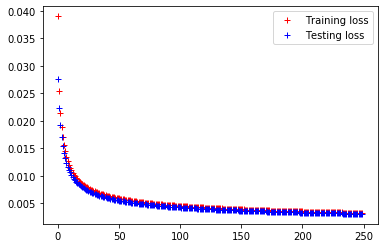

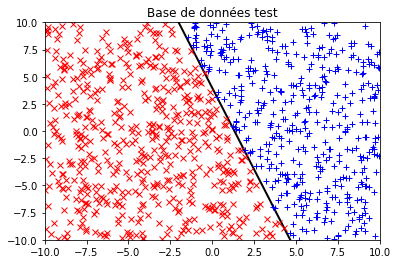

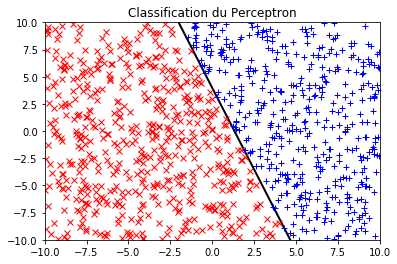

In [0]:
datatrain=data(ntrain,biais)
datatest=data(ntest,biais)
w=[rd.uniform(0,1),rd.uniform(0,1),rd.randint(0,1)]
train_loss=[]
test_loss=[]

for i in range(epoch):
  w,epoch_loss=entrainement(datatrain,seuil,tauxapprentissage,activation,activationderive,loss_func,lossderive,w)
  train_loss.append(epoch_loss)
  test_loss.append(execute(datatest,w,activation)[1])

x=[i for i in range(epoch)]

plt.figure()

plt.plot(x,train_loss,'r+',label="Training loss")
plt.plot(x,test_loss,'b+',label="Testing loss")
plt.legend()

yprevu,_=execute(datatest,w,activation)
ytest=[datatest[k][-1] for k in range(len(datatest))]
t=np.linspace(-10,10,2000)
y=[f(k) for k in t]
print('Taux de reconnaissance :', tauxreussite(ytest,yprevu))


plt.figure()

plt.plot(t,y,color='k',linewidth=2)
for k in range (len(datatest)):
    if ytest[k]==1:
        plt.plot(datatest[k][1],datatest[k][2],'b+')
    else:
        plt.plot(datatest[k][1],datatest[k][2],'rx')


plt.title("Base de données test")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.figure()

plt.plot(t,y,color='k',linewidth=2)
for k in range (len(datatest)):
    if yprevu[k]==1:
        plt.plot(datatest[k][1],datatest[k][2],'b+')
    else:
        plt.plot(datatest[k][1],datatest[k][2],'rx')

plt.title("Classification du Perceptron")
plt.xlim(-10,10)
plt.ylim(-10,10)

plt.show()